#  Capstone Project of Group 1 of the DTU Data Science course 2020

## Notebook 1: Data analysis & Persistence model

### Exercise description: 
A dataset was given with data obtained from the open data website edp.com and the task was given to create a prediction model for the power forecast based on the provided data.

### Project participants: 
Alessandro Sebastiani <aseb@dtu.dk>; Leonardo Andrès Alcayaga Romàn <lalc@dtu.dk>; Moritz Wegener <mbgw@kth.se>

### Work packages:

1. Insert and inspect data (Notebook 1)

2. Create a persistence model/reference model (Notebook 1)    
    
3. Annreg MLPregression model: Sklearn (Notebook 2)

4. Use uniivariate machine learning: GRU, LSTM
       
5. Use multivariate machine learning: GRU, LSTM
  
6. Results comparison



This notebook is structured as follows:

1.1 Data inspection

1.2 Input variable selection

1.3 Data analysis for all turbines

1.4 Data analysis for the entire windfarm


2.1 Data pre-handling (ffilling)

2.2 Persistence model for all turbines

2.3 Persistence model for the windfarm


Conclusions

# 1.1 Insert and inspect data

As a first step, we have to understand what we are working with. Therefore, we load the dataset into our notebook and conduct a first analysis of the data using the following approach:

1. Load python packages
2. Read in dataset
3. Set date and time for data set
4. Plot power vs. time for all turbines


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
import os


current_path = os.getcwd()
print(current_path )

C:\Users\mbgw\Desktop\Data Science


In [2]:
# Read in data set 
dataset = pd.read_csv('DataScienceCourse_EDPdata.csv', 
                  sep=';')


#Remove excess timestamp data
dataset.Timestamp = dataset.Timestamp.str.replace('\+00:00', '')

In [3]:
#Use panda function to set datatime as index
dataset.Timestamp = pd.to_datetime(dataset.Timestamp )
dataset.set_index('Timestamp', inplace=True)

In [4]:
#Show dataset
dataset.head(20)

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 10:10:00,T01,258.3,120.3,195.4,41.4,30.0,33,34,33,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,15.5,2.0
2016-01-02 10:20:00,T11,282.3,221.0,248.8,17.0,28.0,33,33,33,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,335.2,2.0
2016-01-02 10:30:00,T11,1391.5,242.8,582.2,444.5,28.0,33,33,33,29,...,0.0,-992.0,158.7,40.6,992.0,0.0,158.7,28,346.4,1.0
2016-01-02 10:30:00,T09,1398.4,231.2,735.4,496.5,28.0,33,33,33,48,...,0.0,-1000.0,341.3,167.1,1000.0,0.0,341.3,27,0.1,1.0
2016-01-02 10:30:00,T01,1428.7,217.3,927.5,463.3,30.0,34,34,34,29,...,0.0,-1000.0,306.6,336.9,1000.0,0.0,306.6,28,348.2,1.0
2016-01-02 10:50:00,T11,1295.1,1235.3,1257.4,11.8,30.0,39,40,39,29,...,-353.2,-1000.0,190.5,803.5,1000.0,353.2,190.5,30,339.7,0.0
2016-01-02 11:00:00,T06,258.7,179.8,230.6,16.7,32.0,37,38,38,31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,347.3,2.0
2016-01-02 11:20:00,T06,1367.3,216.4,623.5,454.9,31.0,37,37,38,31,...,0.0,-645.4,68.2,9.6,645.4,0.0,68.2,29,353.5,1.0
2016-01-02 11:30:00,T01,1291.4,183.6,1154.1,265.4,35.0,52,52,52,30,...,0.0,-1000.0,399.1,360.3,1000.0,0.0,399.1,35,354.2,1.0


In [5]:
dataset[dataset.index.duplicated()]

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 10:30:00,T09,1398.4,231.2,735.4,496.5,28.0,33,33,33,48,...,0.0,-1000.0,341.3,167.1,1000.0,0.0,341.3,27,0.1,1.0
2016-01-02 10:30:00,T01,1428.7,217.3,927.5,463.3,30.0,34,34,34,29,...,0.0,-1000.0,306.6,336.9,1000.0,0.0,306.6,28,348.2,1.0
2016-01-02 13:30:00,T07,194.7,82.5,129.1,25.2,30.0,34,35,35,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,3.1,2.0
2016-01-02 13:50:00,T09,203.0,112.8,156.7,19.5,28.0,33,33,34,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,39.1,2.0
2016-01-02 15:10:00,T07,155.5,45.5,90.5,31.0,28.0,35,35,35,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-23 09:10:00,T06,1275.5,1235.4,1251.2,6.7,49.0,62,64,64,38,...,-603.7,-1000.0,123.1,849.8,1000.0,603.7,123.1,47,76.9,0.0
2017-08-23 09:30:00,T11,1669.1,1222.2,1426.8,118.2,59.0,68,68,68,35,...,-849.7,-1000.0,11.3,998.9,1000.0,849.7,11.3,47,90.9,0.0
2017-08-23 09:30:00,T01,1646.1,1220.8,1348.6,118.5,46.0,65,65,65,35,...,-307.2,-1000.0,207.7,871.9,1000.0,307.2,207.7,48,108.4,0.0


 <span style="color:blue"> --> We have a dataset of 5 Turbines with 83 variables per turbine for 10 min timesteps. As we are aiming for predicting the average power output, we should take a quick look at the average power output of all turbines for the given timeframe. </span>


<IPython.core.display.Javascript object>


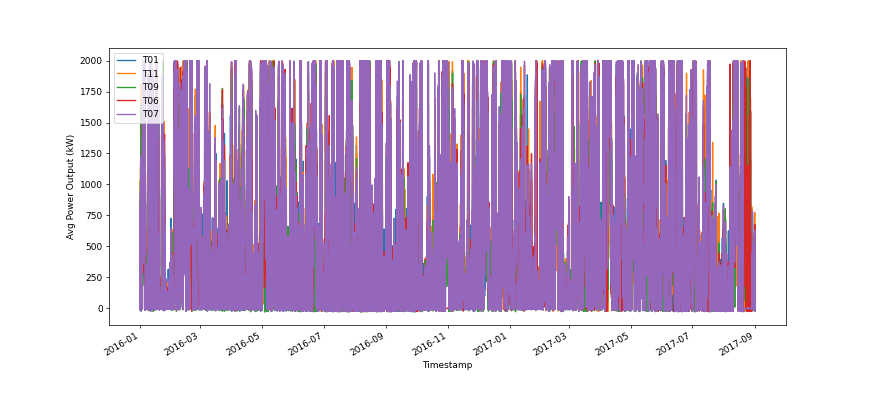

Text(0, 0.5, 'Avg Power Output (kW)')

In [6]:
# Graph for average power output per turbine 
fig,ax = plt.subplots(figsize = (15,7))
for t in dataset.Turbine_ID.unique():  #for loop to show this graph for each turbine
    dataset[dataset.Turbine_ID==t].Grd_Prod_Pwr_Avg.plot(ax=ax,label=t, alpha = 1)
ax.legend()
plt.ylabel('Avg Power Output (kW)')

In [7]:
#Show dataset columns
dataset.columns

Index(['Turbine_ID', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', '

# <span style="color:blue"> 1.2 Select and inspect  main input variables for the power forecast model

 <span style="color:blue"> Now we have a clearer picture of our data. In the next steps, we will pre_select those variables with the highest impact on our forecast and then see how they correlate with our power output. 

1. Select variables that are most likely to affect power output
2. Plot heatmap of correlation between selected variables
3. Data analysis: Turbines (Correlations between turbines, power, and windspeed)  </span>


In [8]:
# Select variables to be used for further analysis with dataset_ch and localize timezone for dataset_ch
channels= ['Turbine_ID',
           'Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_RPM_Max', 'Gen_RPM_Min',
           'Rtr_RPM_Avg', 'Rtr_RPM_Std', 'Rtr_RPM_Max', 'Rtr_RPM_Min', 
           'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindSpeed_Max','Amb_WindSpeed_Min', 
           'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg',
           'Amb_Temp_Avg',
           'Blds_PitchAngle_Avg', 'Blds_PitchAngle_Std','Blds_PitchAngle_Max','Blds_PitchAngle_Min',
           'Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Std', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min',
           'Amb_WindSpeed_Est_Avg',
           'Nac_Direction_Avg',
           'Status_Flag']
dataset_ch = dataset[channels].copy()
dataset_ch.tz_localize('UTC')
dataset_ch.sort_index(inplace=True)


<IPython.core.display.Javascript object>


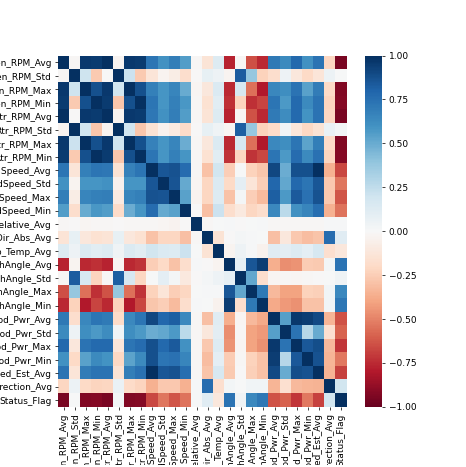

<AxesSubplot:>

In [9]:
#Graph correlation between all selected categories
#per turbine
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(dataset_ch.corr(),vmin=-1, vmax=1, cmap=plt.cm.RdBu)


In [10]:
dataset_ch.corr()

,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Gen_RPM_Avg,1.000000,-0.009451,0.966526,0.955456,0.999364,-0.026145,0.965487,0.954821,0.728270,0.607450,...,-0.014993,-0.641433,-0.757163,0.713607,0.633481,0.784295,0.603824,0.737873,-0.217600,-0.949818
Gen_RPM_Std,-0.009451,1.000000,0.209578,-0.260766,-0.006319,0.992774,0.210951,-0.258506,-0.127029,-0.029837,...,0.828209,0.386024,-0.233170,-0.177808,0.049314,-0.112136,-0.200865,-0.125667,0.059176,0.007137
Gen_RPM_Max,0.966526,0.209578,1.000000,0.880541,0.966733,0.191936,0.999197,0.880267,0.685404,0.593595,...,0.166983,-0.547618,-0.798085,0.653962,0.621455,0.737595,0.544611,0.695344,-0.197763,-0.926214
Gen_RPM_Min,0.955456,-0.260766,0.880541,1.000000,0.954332,-0.275098,0.879286,0.998677,0.732726,0.588645,...,-0.219320,-0.730421,-0.675114,0.729322,0.576112,0.775480,0.638494,0.741652,-0.223525,-0.920554
Rtr_RPM_Avg,0.999364,-0.006319,0.966733,0.954332,1.000000,-0.023823,0.966514,0.954721,0.726225,0.605952,...,-0.011907,-0.637797,-0.755713,0.709719,0.631119,0.780579,0.600294,0.735869,-0.215365,-0.949609
Rtr_RPM_Std,-0.026145,0.992774,0.191936,-0.275098,-0.023823,1.000000,0.195493,-0.276521,-0.143683,-0.044206,...,0.822254,0.386601,-0.226998,-0.188761,0.038212,-0.124940,-0.209871,-0.142531,0.062762,0.026403
Rtr_RPM_Max,0.965487,0.210951,0.999197,0.879286,0.966514,0.195493,1.000000,0.879254,0.678900,0.587687,...,0.167653,-0.548739,-0.799921,0.648233,0.619040,0.732380,0.538974,0.688846,-0.194447,-0.925012
Rtr_RPM_Min,0.954821,-0.258506,0.880267,0.998677,0.954721,-0.276521,0.879254,1.000000,0.733349,0.589655,...,-0.216027,-0.725160,-0.670791,0.726759,0.575724,0.773404,0.635877,0.742324,-0.222273,-0.921099
Amb_WindSpeed_Avg,0.728270,-0.127029,0.685404,0.732726,0.726225,-0.143683,0.678900,0.733349,1.000000,0.855650,...,0.000862,-0.226636,-0.280057,0.906411,0.496090,0.880333,0.875441,0.996717,-0.358117,-0.668904
Amb_WindSpeed_Std,0.607450,-0.029837,0.593595,0.588645,0.605952,-0.044206,0.587687,0.589655,0.855650,1.000000,...,0.094900,-0.132260,-0.248057,0.789346,0.518768,0.787689,0.728506,0.855070,-0.271152,-0.537376


 <span style="color:blue"> We have found a strong correlation with wind speed and generator RPM. Other variables have been determined to be neglibile for estiamtion of power generation.

##  <span style="color:blue">  1.3 Data analysis: Turbines
    
<span style="color:blue">Now, we check how the selected variables of each turbine correlate with each other in between turbines.

1. Split data for each turbine (focusing on windspeed and power)
2. Plot correlations between each turbine for power
3. Plot correlations between each turbine for wind speed
4. 
    1. Plot correlations between wind power and turbine power output
    2. Plot correlations between turbine power output for different timesteps

In [11]:
#Create new array with turbine IDs
turbinesid = dataset_ch.Turbine_ID.unique()
turbinesid

array(['T09', 'T06', 'T01', 'T07', 'T11'], dtype=object)

In [12]:
power_turb = [group.Grd_Prod_Pwr_Avg for _, group in dataset_ch.groupby('Turbine_ID')]

In [13]:
# The following lines are already magic I cannot fully understand right here. Cheers to Leonardo
# Tried with if and for loops but everything exploded computing time

#Create new df with power output of each turbine for each timestep
power_turb = [group.Grd_Prod_Pwr_Avg for _, group in dataset_ch.groupby('Turbine_ID')]
power_turb = [pd.DataFrame(columns=[t],data=p.values,index=p.index) for t,p in zip(turbinesid,power_turb)]
power_turb = pd.concat([p[~p.index.duplicated()] for p in power_turb],axis=1,join='inner')


#Create new df with power output of each turbine for each timestep
wind_turb  = [group.Amb_WindSpeed_Avg for _, group in dataset_ch.groupby('Turbine_ID')]
wind_turb  = [pd.DataFrame(columns=['W_'+t],data=w.values,index=w.index) for t,w in zip(turbinesid,wind_turb)]
wind_turb  = pd.concat([w[~w.index.duplicated()] for w in wind_turb],axis=1,join='inner')

In [14]:
power_turb

,T09,T06,T01,T07,T11
Timestamp,,,,,
2016-01-01 00:00:00,26.2,62.5,112.7,198.4,246.1
2016-01-01 00:10:00,10.1,8.9,95.5,231.1,304.7
2016-01-01 00:20:00,59.0,4.0,103.6,312.3,364.2
2016-01-01 00:30:00,135.7,100.3,134.3,398.8,465.0
2016-01-01 00:40:00,98.9,196.6,297.5,366.3,404.6
...,...,...,...,...,...
2017-08-31 23:20:00,110.5,315.9,199.6,175.0,303.8
2017-08-31 23:30:00,91.8,255.9,197.0,25.7,149.6
2017-08-31 23:40:00,67.5,211.8,123.1,20.0,82.6


In [15]:
wind_turb

,W_T09,W_T06,W_T01,W_T07,W_T11
Timestamp,,,,,
2016-01-01 00:00:00,3.3,3.8,4.1,5.2,5.3
2016-01-01 00:10:00,3.2,3.5,4.1,5.7,5.7
2016-01-01 00:20:00,4.3,3.1,4.1,6.2,6.1
2016-01-01 00:30:00,4.4,4.2,4.4,6.3,6.3
2016-01-01 00:40:00,4.1,4.9,5.5,6.6,6.4
...,...,...,...,...,...
2017-08-31 23:20:00,4.3,5.7,4.8,5.2,5.9
2017-08-31 23:30:00,4.1,5.3,4.9,3.8,5.0
2017-08-31 23:40:00,4.0,5.0,4.3,3.9,4.3


<IPython.core.display.Javascript object>


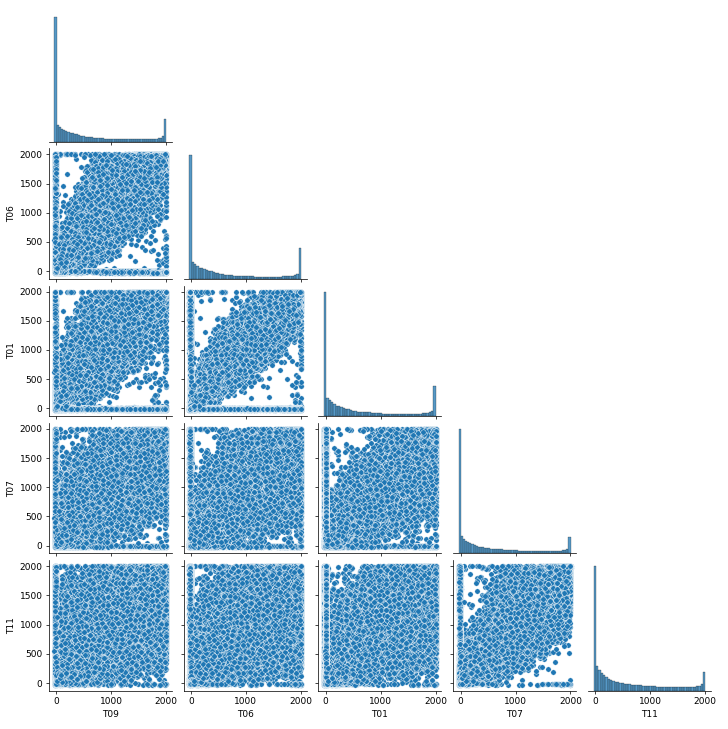

,T09,T06,T01,T07,T11
T09,1.000000,0.894026,0.907049,0.870911,0.860974
T06,0.894026,1.000000,0.887420,0.872365,0.860824
T01,0.907049,0.887420,1.000000,0.863443,0.844115
T07,0.870911,0.872365,0.863443,1.000000,0.917596
T11,0.860974,0.860824,0.844115,0.917596,1.000000


In [16]:
sns.pairplot(power_turb, corner=True)
power_turb.corr()

# Result: There seems to be some high correlation in the power generation of the different turbines, but there are also many outliers.

<IPython.core.display.Javascript object>


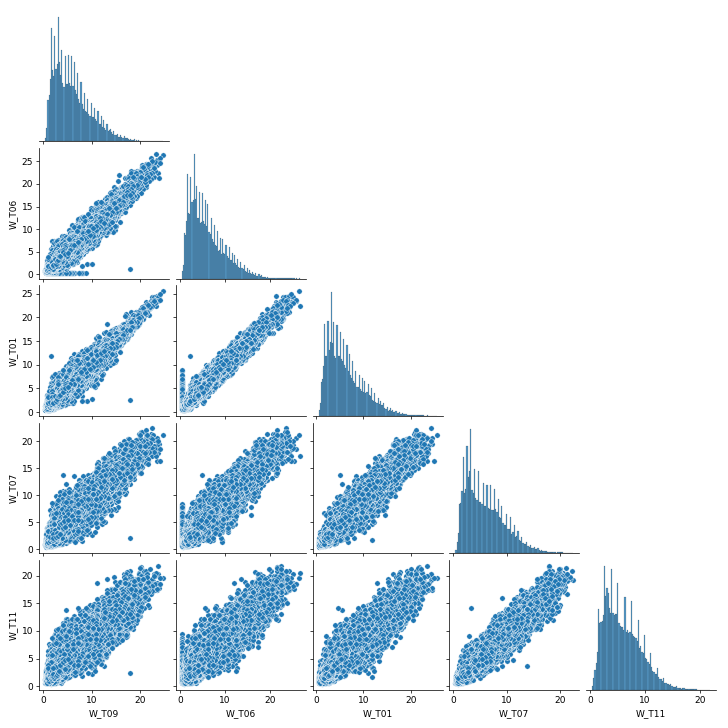

,W_T09,W_T06,W_T01,W_T07,W_T11
W_T09,1.000000,0.974009,0.976616,0.947059,0.914302
W_T06,0.974009,1.000000,0.985398,0.951605,0.916687
W_T01,0.976616,0.985398,1.000000,0.962157,0.928413
W_T07,0.947059,0.951605,0.962157,1.000000,0.963777
W_T11,0.914302,0.916687,0.928413,0.963777,1.000000


In [17]:
sns.pairplot(wind_turb, corner=True)
wind_turb.corr()

# The corrleation between wind speed is stronger with less outliers
# --> Wind turbine failures reduce correlation in power generation

<IPython.core.display.Javascript object>


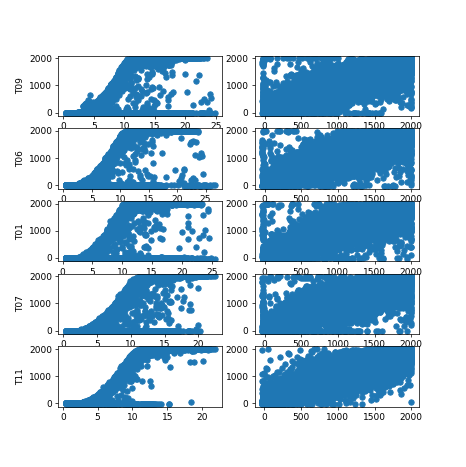

In [18]:
#per turbine
fig,ax = plt.subplots(len(turbinesid),2,figsize=(8,8))
for i, t in enumerate(turbinesid):
    ax[i,0].scatter(wind_turb['W_'+t],power_turb[t])
    ax[i,1].scatter(power_turb[t][1:],power_turb[t][:-1])
    ax[i,0].set_ylabel(t)

<span style="color:blue"> Wind and power output of the turbines do correlate fairly well between each other. They are most likely placed close to each other. We can now make wild guesses: Maybe (!) based on the wind correlation, we could argue that T09, T06, and T01 are grouped together, while T07 is placed a bit part and T11 even more so. 

## <span style="color:blue"> 1.4 Data analysis: Wind farm level
    
<span style="color:blue"> Now we can check how the power output of the whole windfarm correlates with itself over different timesteps and how power & wind correlate.
    
1. Graph timestep correlation of power generation to itself
2. Graph correlation between power generation on wind farm level for one hour past/future


In [19]:
# Rename all windspeed data to W using mean, rename all power data to P summing up power
P = dataset_ch.Grd_Prod_Pwr_Avg.groupby(level=0).sum()
W = dataset_ch.Amb_WindSpeed_Avg.groupby(level=0).mean()

<IPython.core.display.Javascript object>


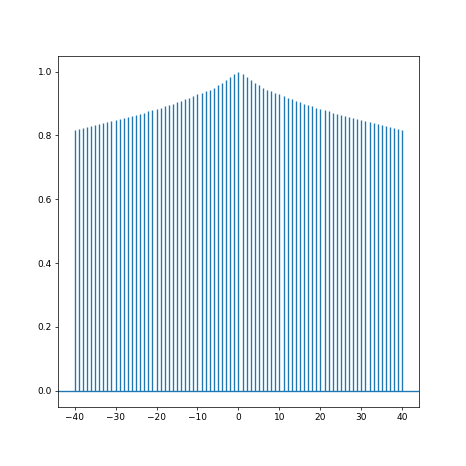

(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40]),
 array([0.81610287, 0.81886467, 0.82172961, 0.82473432, 0.8279096 ,
        0.83111496, 0.83434109, 0.8376132 , 0.84083453, 0.84402436,
        0.84738384, 0.85068811, 0.85395192, 0.85723735, 0.86055798,
        0.86410984, 0.86777312, 0.87152043, 0.87541953, 0.87932208,
        0.88319467, 0.88712826, 0.89116693, 0.89532599, 0.89956078,
        0.90398143, 0.90872358, 0.91348974, 0.91832377, 0.92326673,
        0.92801246, 0.9328011 , 0.93796437, 0.94361457, 0.94976101,
        0.95661113, 0.96412543, 0.97238505, 0.98161486, 0.992

In [20]:
#Figure for chronical correlation
fig, ax = plt.subplots(figsize=(8,8))
ax.xcorr(P,P, maxlags=40)


<IPython.core.display.Javascript object>


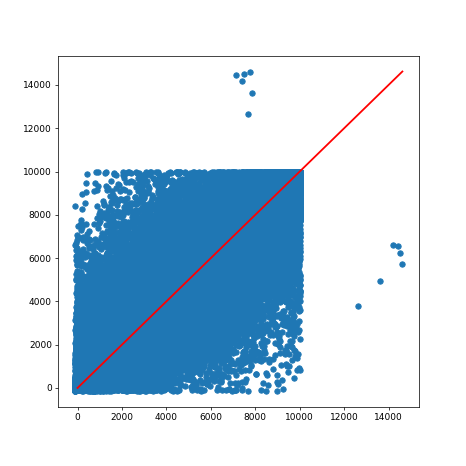

In [21]:
#Figure for power correlation on windfarm lvl for one hour ahead vs. one hour in the past
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(P.values[:-6],P.values[6:])
ax.plot([0,np.nanmax(P.values)],[0,np.nanmax(P.values)],'-r',lw=2)

<span style="color:blue"> The power output generation correlates very well over given timesteps, which will be crucial for our prediction models.

# <span style="color:blue">  2. Fill data and create a persistence model (reference model)
    
 <span style="color:blue"> Having the data analysed, we can now create our first model: The persistence model. This simple model, will use the value given for each hour (e.g. at 10:00) and then forward fill it for remaining part of the hour (until 10:50). This persistence model will be our reference model. We will create one for each turbine and then sum up the results for the entire wind farm level.

1. Check missing time stamps and sample rate missing timesteps
2. Use forward fill to create sequences of 6 steps having equal values 
3. For each turbine: Plot persistence model vs input data, plot error (persistence - raw data), and check correlation
4. For windfarm level: Plot persistence model vs input data, plot error (persistence - raw data), and check correlation


##  <span style="color:blue">  Check missing timesteps and fill data

In [22]:
#Identify missing time stamps 

missing_time_stamps = pd.date_range(start=dataset_ch.index[0],
                                    end=dataset_ch.index[-1], 
                                    freq='10T').difference(dataset_ch.index) #
missing_time_stamps


#dataset_sampled = pd.concat([p[~p.index.duplicated()] for p in dataset_ch],axis=1,join='inner')

DatetimeIndex(['2016-03-27 02:00:00', '2016-03-27 02:10:00',
               '2016-03-27 02:20:00', '2016-03-27 02:30:00',
               '2016-03-27 02:40:00', '2016-03-27 02:50:00',
               '2016-05-20 01:10:00', '2016-05-20 01:20:00',
               '2016-05-20 01:30:00', '2016-05-20 01:40:00',
               ...
               '2017-07-06 19:00:00', '2017-07-06 19:10:00',
               '2017-07-06 19:20:00', '2017-07-06 19:30:00',
               '2017-07-06 19:40:00', '2017-07-06 19:50:00',
               '2017-07-06 20:00:00', '2017-07-06 20:10:00',
               '2017-07-06 20:20:00', '2017-07-06 20:30:00'],
              dtype='datetime64[ns]', length=355, freq=None)

In [23]:
dataset_ch[~dataset_ch.index.duplicated()]

,Turbine_ID,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T09,1272.0,24.7,1376.7,1234.3,11.2,0.2,12.2,10.9,5.2,...,0.5,0.6,-2.2,198.4,61.0,349.0,46.0,5.1,214.0,0.0
2016-01-01 00:10:00,T11,1303.6,40.2,1400.5,1239.8,11.5,0.4,12.4,11.0,5.7,...,0.4,-0.8,-2.2,304.7,54.4,430.4,191.3,5.8,206.9,0.0
2016-01-01 00:20:00,T11,1344.3,27.2,1423.6,1270.8,11.9,0.2,12.6,11.3,6.1,...,0.2,-1.3,-2.2,364.2,49.7,468.3,211.3,6.1,206.9,0.0
2016-01-01 00:30:00,T07,1259.9,25.4,1408.5,1227.0,11.2,0.2,12.4,10.9,4.4,...,0.6,1.2,-2.2,134.3,76.9,378.7,30.5,4.6,204.0,0.0
2016-01-01 00:40:00,T11,1396.2,66.8,1539.1,1252.1,12.4,0.6,13.6,11.1,6.4,...,0.3,-1.0,-2.3,404.6,98.6,641.9,204.3,6.3,206.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:20:00,T06,1284.4,46.2,1407.0,1233.1,11.4,0.4,12.4,10.9,5.7,...,0.4,-0.8,-2.4,315.9,70.7,489.2,190.7,5.8,97.3,0.0
2017-08-31 23:30:00,T11,1249.8,4.1,1265.2,1238.6,11.1,0.0,11.2,10.9,5.0,...,0.2,0.8,-1.8,149.6,29.1,197.8,73.4,4.8,117.5,0.0
2017-08-31 23:40:00,T09,1176.0,239.6,1393.6,303.1,10.4,2.2,12.3,2.7,3.9,...,5.5,24.0,-2.4,20.0,40.9,182.3,-28.7,3.7,110.5,1.0


In [24]:
dataset_ch

,Turbine_ID,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,T09,1272.0,24.7,1376.7,1234.3,11.2,0.2,12.2,10.9,5.2,...,0.5,0.6,-2.2,198.4,61.0,349.0,46.0,5.1,214.0,0.0
2016-01-01,T06,1248.5,6.8,1270.0,1232.8,11.1,0.1,11.2,10.9,3.8,...,0.5,0.9,-1.1,62.5,36.9,178.4,-17.8,4.0,204.6,1.0
2016-01-01,T01,1249.0,9.0,1277.4,1226.1,11.1,0.1,11.3,10.9,3.3,...,0.9,4.5,-1.1,26.2,35.3,118.4,-33.5,3.6,218.5,1.0
2016-01-01,T07,1254.9,13.8,1317.5,1229.5,11.1,0.1,11.7,10.9,4.1,...,0.8,2.5,-2.0,112.7,75.2,277.3,-11.5,4.4,197.3,1.0
2016-01-01,T11,1270.9,18.8,1339.4,1233.3,11.3,0.2,11.9,10.9,5.3,...,0.3,0.9,-2.1,246.1,51.8,368.9,154.1,5.4,206.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,T11,1250.6,5.1,1266.3,1234.3,11.1,0.0,11.2,10.9,4.9,...,0.3,0.6,-1.8,177.6,24.3,230.6,108.0,5.0,96.8,0.0
2017-09-01,T01,1255.3,12.4,1299.0,1222.1,11.1,0.1,11.4,10.8,5.1,...,0.7,0.5,-2.3,183.9,61.4,309.3,61.6,5.0,109.5,0.0
2017-09-01,T09,1251.9,6.0,1268.4,1240.1,11.1,0.1,11.2,10.9,5.3,...,0.4,0.2,-2.2,188.2,31.7,250.0,63.1,5.1,105.0,0.0


In [25]:
## Create dataset for each turbine
            # Maybe this could be done with a dictionary, but I could not figure out how
df_T01 = dataset_ch[:][dataset_ch.Turbine_ID == 'T01']
df_T06 = dataset_ch[:][dataset_ch.Turbine_ID == 'T06']
df_T07 = dataset_ch[:][dataset_ch.Turbine_ID == 'T07']
df_T09 = dataset_ch[:][dataset_ch.Turbine_ID == 'T09']
df_T11 = dataset_ch[:][dataset_ch.Turbine_ID == 'T11']


#There is some data with the same timesteps (one hour, probably due to summer/winter change, too lazy too look up how to get rid of it in a better way)
df_T01 = df_T01[~df_T01.index.duplicated()]   
df_T06 = df_T06[~df_T06.index.duplicated()]   
df_T07 = df_T07[~df_T07.index.duplicated()]   
df_T09 = df_T09[~df_T09.index.duplicated()]   
df_T11 = df_T11[~df_T11.index.duplicated()]   

In [26]:
dataset_ch[dataset_ch.index.duplicated()]

,Turbine_ID,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T06,1248.5,6.8,1270.0,1232.8,11.1,0.1,11.2,10.9,3.8,...,0.5,0.9,-1.1,62.5,36.9,178.4,-17.8,4.0,204.6,1.0
2016-01-01 00:00:00,T01,1249.0,9.0,1277.4,1226.1,11.1,0.1,11.3,10.9,3.3,...,0.9,4.5,-1.1,26.2,35.3,118.4,-33.5,3.6,218.5,1.0
2016-01-01 00:00:00,T07,1254.9,13.8,1317.5,1229.5,11.1,0.1,11.7,10.9,4.1,...,0.8,2.5,-2.0,112.7,75.2,277.3,-11.5,4.4,197.3,1.0
2016-01-01 00:00:00,T11,1270.9,18.8,1339.4,1233.3,11.3,0.2,11.9,10.9,5.3,...,0.3,0.9,-2.1,246.1,51.8,368.9,154.1,5.4,206.9,0.0
2016-01-01 00:10:00,T07,1251.9,7.1,1271.1,1233.4,11.1,0.1,11.3,10.9,4.1,...,0.5,0.9,-1.1,95.5,37.1,154.7,-1.9,4.3,203.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:50:00,T06,1249.7,8.8,1273.5,1227.8,11.1,0.1,11.3,10.9,4.6,...,0.6,0.6,-2.2,143.5,65.9,304.6,28.0,4.7,81.9,0.0
2017-09-01 00:00:00,T01,1255.3,12.4,1299.0,1222.1,11.1,0.1,11.4,10.8,5.1,...,0.7,0.5,-2.3,183.9,61.4,309.3,61.6,5.0,109.5,0.0
2017-09-01 00:00:00,T09,1251.9,6.0,1268.4,1240.1,11.1,0.1,11.2,10.9,5.3,...,0.4,0.2,-2.2,188.2,31.7,250.0,63.1,5.1,105.0,0.0


In [27]:
#Resample each turbine data set
df_T01_sampled = df_T01.resample('10 min').asfreq()
df_T06_sampled = df_T06.resample('10 min').asfreq()
df_T07_sampled = df_T07.resample('10 min').asfreq()
df_T09_sampled = df_T09.resample('10 min').asfreq()
df_T11_sampled = df_T11.resample('10 min').asfreq()

df_T01_sampled

,Turbine_ID,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T01,1249.0,9.0,1277.4,1226.1,11.1,0.1,11.3,10.9,3.3,...,0.9,4.5,-1.1,26.2,35.3,118.4,-33.5,3.6,218.5,1.0
2016-01-01 00:10:00,T01,999.7,435.9,1268.3,93.3,8.8,4.0,11.2,0.0,3.2,...,14.7,59.6,-0.9,10.1,30.2,101.5,-38.2,3.3,218.5,1.0
2016-01-01 00:20:00,T01,774.0,486.1,1394.4,220.3,6.8,4.3,12.3,1.9,4.3,...,12.4,24.0,-2.2,59.0,77.5,219.4,-34.1,4.1,213.3,1.0
2016-01-01 00:30:00,T01,1257.1,17.0,1306.6,1212.4,11.1,0.1,11.5,10.7,4.4,...,0.8,0.9,-1.9,135.7,53.9,250.3,-27.7,4.6,222.4,1.0
2016-01-01 00:40:00,T01,1257.7,18.0,1320.9,1224.1,11.1,0.2,11.7,10.8,4.1,...,1.2,4.4,-2.0,98.9,65.9,212.5,-50.2,4.3,222.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:20:00,T01,1249.4,9.5,1279.2,1226.6,11.1,0.1,11.3,10.9,4.3,...,0.8,1.0,-2.2,110.5,74.0,283.3,-11.0,4.4,120.9,1.0
2017-08-31 23:30:00,T01,1249.2,10.1,1277.0,1224.9,11.1,0.1,11.3,10.8,4.1,...,0.7,2.3,-1.9,91.8,53.0,224.4,-8.2,4.3,115.7,1.0
2017-08-31 23:40:00,T01,1249.2,5.2,1269.5,1237.2,11.1,0.0,11.2,10.9,4.0,...,1.2,4.4,-2.2,67.5,66.6,192.8,-29.4,4.0,112.8,1.0


In [28]:
#Nan checks

df_T01_sampled.isna().sum()
#df_T06_sampled.isna().sum()
#df_T07_sampled.isna().sum()
#df_T09_sampled.isna().sum()
#df_T11_sampled.isna().sum()


Turbine_ID                  557
Gen_RPM_Avg                 557
Gen_RPM_Std                 557
Gen_RPM_Max                 557
Gen_RPM_Min                 557
Rtr_RPM_Avg                 557
Rtr_RPM_Std                 557
Rtr_RPM_Max                 557
Rtr_RPM_Min                 557
Amb_WindSpeed_Avg           557
Amb_WindSpeed_Std           557
Amb_WindSpeed_Max           557
Amb_WindSpeed_Min           557
Amb_WindDir_Relative_Avg    557
Amb_WindDir_Abs_Avg         557
Amb_Temp_Avg                557
Blds_PitchAngle_Avg         557
Blds_PitchAngle_Std         557
Blds_PitchAngle_Max         557
Blds_PitchAngle_Min         557
Grd_Prod_Pwr_Avg            557
Grd_Prod_Pwr_Std            557
Grd_Prod_Pwr_Max            557
Grd_Prod_Pwr_Min            557
Amb_WindSpeed_Est_Avg       557
Nac_Direction_Avg           557
Status_Flag                 557
dtype: int64

In [29]:
# Forward fill Nan of each turbine set 

df_T01_ffilled = df_T01_sampled.copy().ffill()
df_T06_ffilled = df_T06_sampled.copy().ffill()
df_T07_ffilled = df_T07_sampled.copy().ffill()
df_T09_ffilled = df_T09_sampled.copy().ffill()
df_T11_ffilled = df_T11_sampled.copy().ffill()


In [30]:
df_T01_ffilled

,Turbine_ID,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Max,Gen_RPM_Min,Rtr_RPM_Avg,Rtr_RPM_Std,Rtr_RPM_Max,Rtr_RPM_Min,Amb_WindSpeed_Avg,...,Blds_PitchAngle_Std,Blds_PitchAngle_Max,Blds_PitchAngle_Min,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Amb_WindSpeed_Est_Avg,Nac_Direction_Avg,Status_Flag
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T01,1249.0,9.0,1277.4,1226.1,11.1,0.1,11.3,10.9,3.3,...,0.9,4.5,-1.1,26.2,35.3,118.4,-33.5,3.6,218.5,1.0
2016-01-01 00:10:00,T01,999.7,435.9,1268.3,93.3,8.8,4.0,11.2,0.0,3.2,...,14.7,59.6,-0.9,10.1,30.2,101.5,-38.2,3.3,218.5,1.0
2016-01-01 00:20:00,T01,774.0,486.1,1394.4,220.3,6.8,4.3,12.3,1.9,4.3,...,12.4,24.0,-2.2,59.0,77.5,219.4,-34.1,4.1,213.3,1.0
2016-01-01 00:30:00,T01,1257.1,17.0,1306.6,1212.4,11.1,0.1,11.5,10.7,4.4,...,0.8,0.9,-1.9,135.7,53.9,250.3,-27.7,4.6,222.4,1.0
2016-01-01 00:40:00,T01,1257.7,18.0,1320.9,1224.1,11.1,0.2,11.7,10.8,4.1,...,1.2,4.4,-2.0,98.9,65.9,212.5,-50.2,4.3,222.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:20:00,T01,1249.4,9.5,1279.2,1226.6,11.1,0.1,11.3,10.9,4.3,...,0.8,1.0,-2.2,110.5,74.0,283.3,-11.0,4.4,120.9,1.0
2017-08-31 23:30:00,T01,1249.2,10.1,1277.0,1224.9,11.1,0.1,11.3,10.8,4.1,...,0.7,2.3,-1.9,91.8,53.0,224.4,-8.2,4.3,115.7,1.0
2017-08-31 23:40:00,T01,1249.2,5.2,1269.5,1237.2,11.1,0.0,11.2,10.9,4.0,...,1.2,4.4,-2.2,67.5,66.6,192.8,-29.4,4.0,112.8,1.0


##  <span style="color:blue"> 2.2 Persistence model for each turbine


In [31]:
#Edit datasets for persistence model with 
    #Step 1: Resample to 60 min timesteps
    #Step 2: Resample to 10 min timesteps and forward fill

    # Do it for T01
#Step 1
sampling_rate1 = '60T' # we have 10min resolution in our dataset
df_T01_60 = df_T01_ffilled[1:].copy().resample(sampling_rate1).asfreq()
df_T01_60

#Step 2
sampling_rate2 = '10T' # we have 10min resolution in our dataset
df_T01_60_10 = df_T01_60[1:].copy().resample(sampling_rate2).asfreq()
df_T01_60_10.ffill(inplace=True)


   # Do it for T06
sampling_rate1 = '60T' # we have 10min resolution in our dataset
df_T06_60 = df_T06_ffilled[1:].copy().resample(sampling_rate1).asfreq()
df_T06_60

sampling_rate2 = '10T' # we have 10min resolution in our dataset
df_T06_60_10 = df_T06_60[1:].copy().resample(sampling_rate2).asfreq()
df_T06_60_10.ffill(inplace=True)


   # Do it for T07
sampling_rate1 = '60T' # we have 10min resolution in our dataset
df_T07_60 = df_T07_ffilled[1:].copy().resample(sampling_rate1).asfreq()
df_T07_60

sampling_rate2 = '10T' # we have 10min resolution in our dataset
df_T07_60_10 = df_T07_60[1:].copy().resample(sampling_rate2).asfreq()
df_T07_60_10.ffill(inplace=True)


   # Do it for T09
sampling_rate1 = '60T' # we have 10min resolution in our dataset
df_T09_60 = df_T09_ffilled[1:].copy().resample(sampling_rate1).asfreq()
df_T09_60

sampling_rate2 = '10T' # we have 10min resolution in our dataset
df_T09_60_10 = df_T09_60[1:].copy().resample(sampling_rate2).asfreq()
df_T09_60_10.ffill(inplace=True)


   # Do it for T11
sampling_rate1 = '60T' # we have 10min resolution in our dataset
df_T11_60 = df_T11_ffilled[1:].copy().resample(sampling_rate1).asfreq()
df_T11_60

sampling_rate2 = '10T' # we have 10min resolution in our dataset
df_T11_60_10 = df_T11_60[1:].copy().resample(sampling_rate2).asfreq()
df_T11_60_10.ffill(inplace=True)
 

<IPython.core.display.Javascript object>


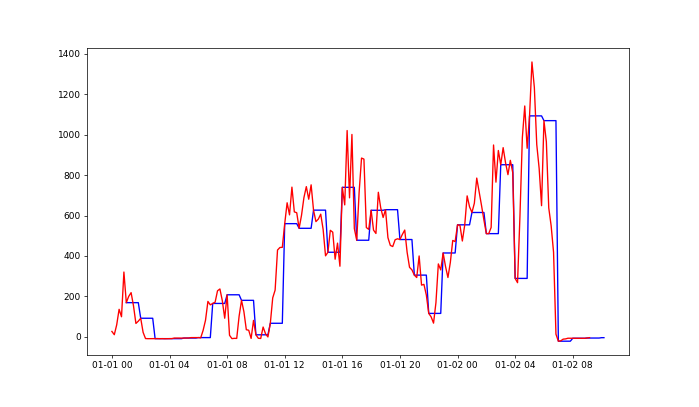

In [32]:
# T01 Persistence model - Power over time
fig,ax = plt.subplots(figsize = (12,7))
x1 = df_T01_60_10.Grd_Prod_Pwr_Avg[:200]
x2 = df_T01_ffilled.Grd_Prod_Pwr_Avg[:200]
plt.plot(x1,label = "Persistence T01",color = 'blue')
plt.plot(x2,label = "Ffilled T01", color = 'red')         
         

 <span style="color:blue"> The rectangular form of the persistence model suggests it worked as planned

<IPython.core.display.Javascript object>


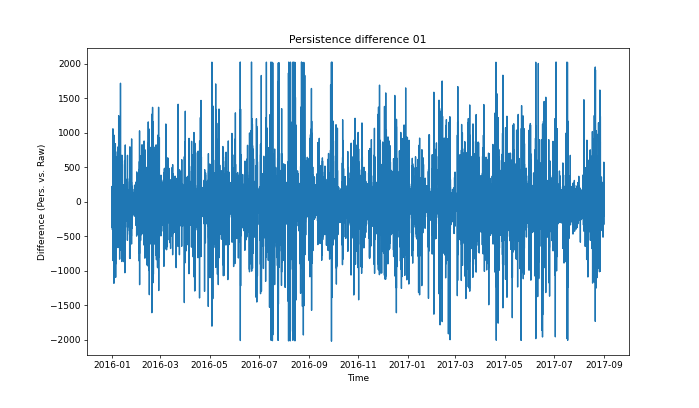

In [33]:
# T01 Persistence vs. raw data
fig,ax = plt.subplots(figsize = (12,7))
x = df_T01_60_10.Grd_Prod_Pwr_Avg
y = df_T01_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference T01")

ax.set_title("Persistence difference 01")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')

# Create R array to compare results later
R = []
R.append(df_T01_60_10.Grd_Prod_Pwr_Avg.corr(df_T01_ffilled.Grd_Prod_Pwr_Avg))
  

<IPython.core.display.Javascript object>


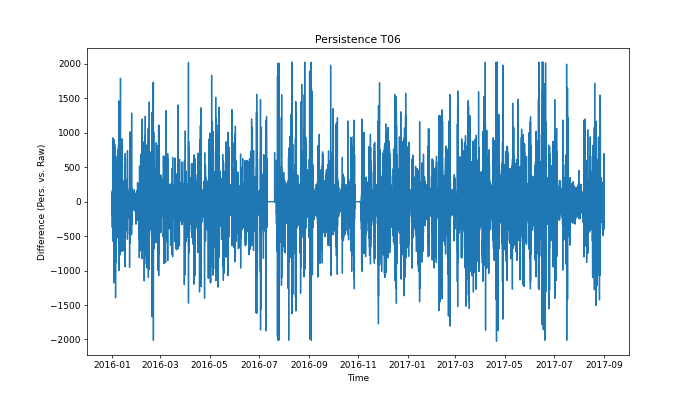

In [34]:
# T06 Persistence vs. raw data
fig,ax = plt.subplots(figsize = (12,7))
x = df_T06_60_10.Grd_Prod_Pwr_Avg
y = df_T06_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference T06")

ax.set_title("Persistence T06")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')


R.append(df_T06_60_10.Grd_Prod_Pwr_Avg.corr(df_T06_ffilled.Grd_Prod_Pwr_Avg))


<IPython.core.display.Javascript object>


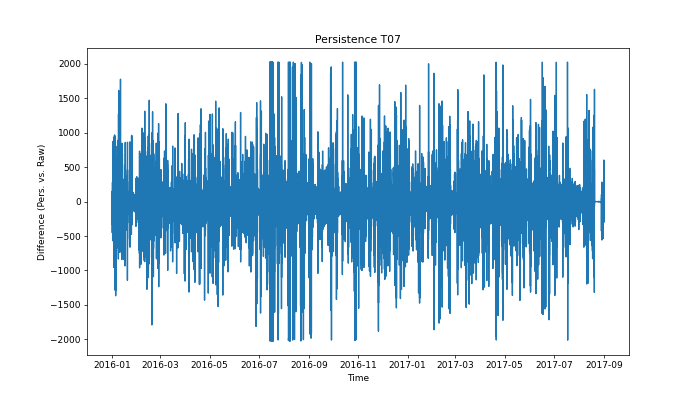

In [35]:
# T07 Persistence vs. raw data
fig,ax = plt.subplots(figsize = (12,7))
x = df_T07_60_10.Grd_Prod_Pwr_Avg
y = df_T07_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference T07")

ax.set_title("Persistence T07")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')

R.append(df_T07_60_10.Grd_Prod_Pwr_Avg.corr(df_T07_ffilled.Grd_Prod_Pwr_Avg))

<IPython.core.display.Javascript object>


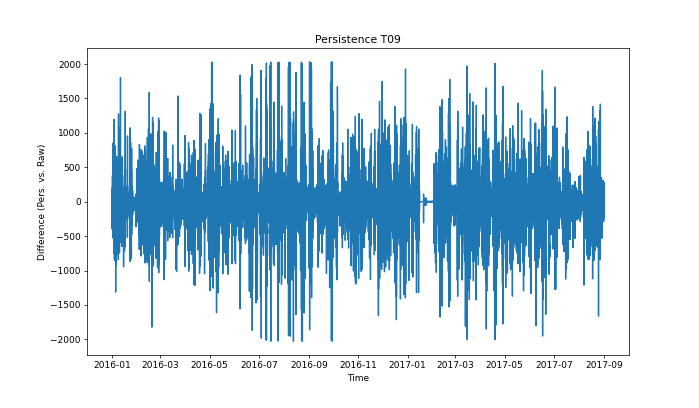

In [36]:
# T09 Persistence vs. raw data
fig,ax = plt.subplots(figsize = (12,7))
x = df_T09_60_10.Grd_Prod_Pwr_Avg
y = df_T09_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference T09")

ax.set_title("Persistence T09")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')

R.append(df_T09_60_10.Grd_Prod_Pwr_Avg.corr(df_T09_ffilled.Grd_Prod_Pwr_Avg))


<IPython.core.display.Javascript object>


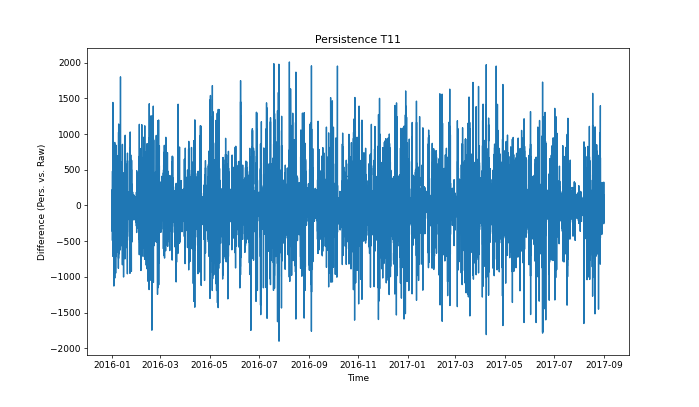

In [37]:
# T11 Persistence vs. raw data
fig,ax = plt.subplots(figsize = (12,7))
x = df_T11_60_10.Grd_Prod_Pwr_Avg
y = df_T11_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference T11")

ax.set_title("Persistence T11")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')

R.append(df_T11_60_10.Grd_Prod_Pwr_Avg.corr(df_T11_ffilled.Grd_Prod_Pwr_Avg))


## <span style="color:blue">  2.3 Persistence model on wind farm level

<IPython.core.display.Javascript object>


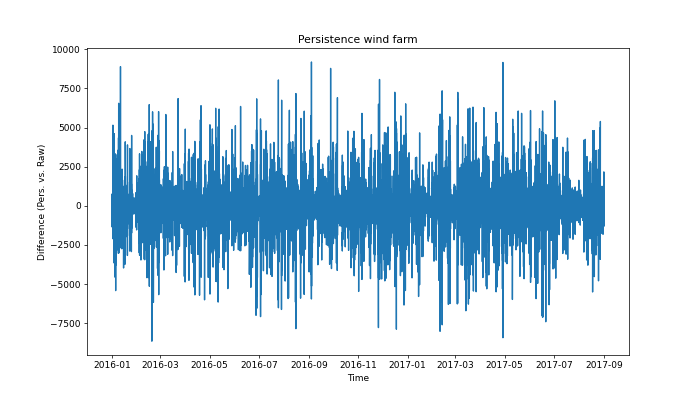

In [38]:
# Wind farm persistence model
fig,ax = plt.subplots(figsize = (12,7))
x = df_T11_60_10.Grd_Prod_Pwr_Avg + df_T09_60_10.Grd_Prod_Pwr_Avg + df_T07_60_10.Grd_Prod_Pwr_Avg + df_T06_60_10.Grd_Prod_Pwr_Avg + df_T01_60_10.Grd_Prod_Pwr_Avg
    
y = df_T11_ffilled.Grd_Prod_Pwr_Avg + df_T09_ffilled.Grd_Prod_Pwr_Avg  + df_T07_ffilled.Grd_Prod_Pwr_Avg  + df_T06_ffilled.Grd_Prod_Pwr_Avg  + df_T01_ffilled.Grd_Prod_Pwr_Avg

plt.plot(x-y,label = "Persistence difference wind farm level")

ax.set_title("Persistence wind farm")
ax.set_xlabel('Time')
ax.set_ylabel('Difference (Pers. vs. Raw)')

R_Windfarm =  x.corr(y)
R.append(R_Windfarm)




In [39]:
R

[0.9420235225124868,
 0.9528225880181311,
 0.9424766792871984,
 0.9373199457823395,
 0.9396265649597232,
 0.9626907438764299]

 # <span style="color:blue">  Conclusions:
    
  <span style="color:blue">  We now have created our first model (albeit a really simple one). The correlation is 0.9627 on the windfarm level, meaning any of our prediction models should at least surpass this value. 

In [ ]:
# Maybe take a look at correlation between each timestep